In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit

--2023-04-09 12:32:01--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.226.70.83, 13.226.70.20, 13.226.70.154, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.226.70.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit’

aerofit             100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-04-09 12:32:01 (18.9 MB/s) - ‘aerofit’ saved [7279/7279]



In [15]:
df = pd.read_csv('aerofit')

In [16]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [18]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [19]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [20]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [21]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [22]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [23]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [24]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [25]:
df['Income'].value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [26]:
df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

# Missing value detection

In [27]:
df.isnull().sum() 

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No missing values

## Outlier detection

In [28]:
df.describe() 

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<Axes: >

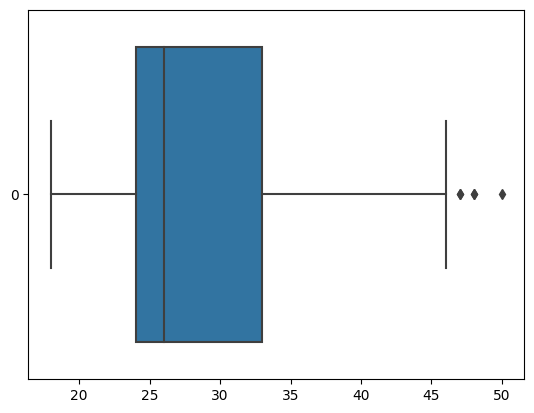

In [29]:

sns.boxplot(df['Age'],orient='h')

<Axes: >

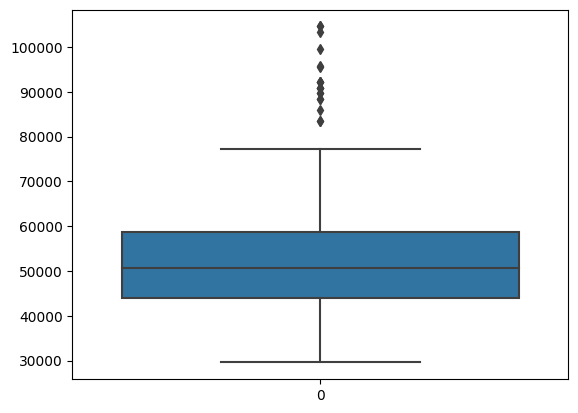

In [30]:
sns.boxplot(df['Income'])

<Axes: >

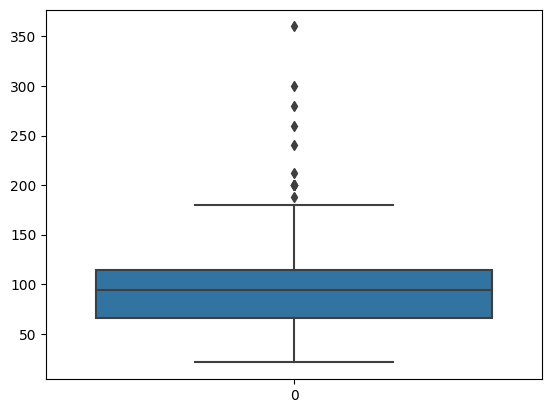

In [31]:
sns.boxplot(df['Miles'])

In [32]:
# function to add percentage with values to piechart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

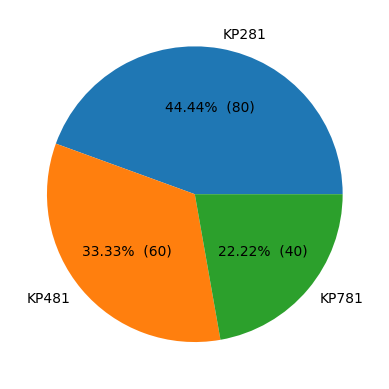

In [33]:
labels = df['Product'].value_counts().index
values = df['Product'].value_counts().values

plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()


## Observation
1. KP281 has been purchased by 80 users(44.44%)
2. KP481 has been purchased by 60 users (33.33%)
3. KP781 has been purchased by 40 users (22.22%)

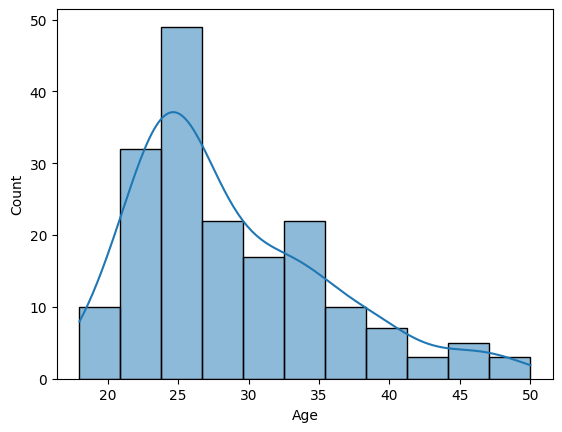

In [34]:
sns.histplot(df['Age'],kde=True)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

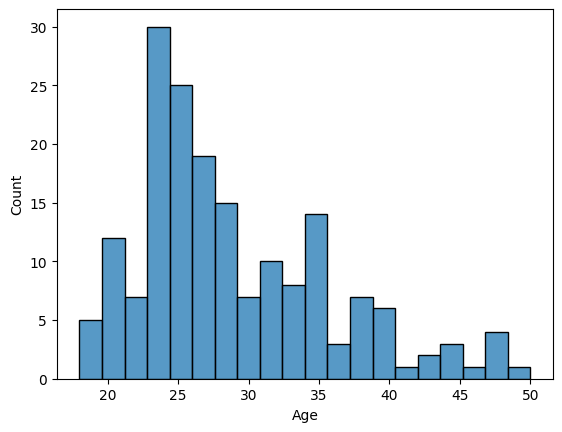

In [35]:
sns.histplot(df['Age'],bins=20)

Onservation:
1. People from the age group of 20-30 have more purchases

<Axes: xlabel='Education', ylabel='Count'>

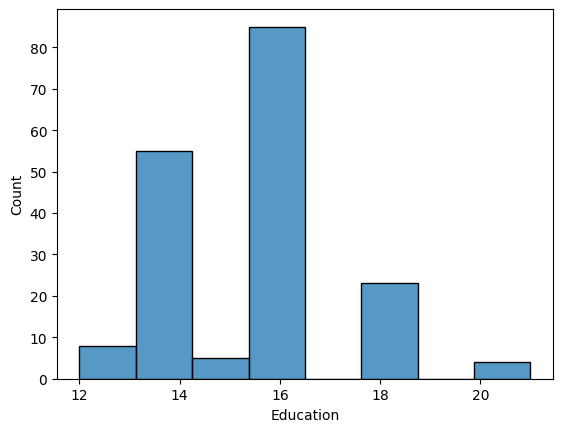

In [36]:

sns.histplot(df['Education'],bins = 8)

## Observation 
1. People with Education 16 followed by 14 and 18 are the Top 3 purchasers  

<Axes: xlabel='Usage', ylabel='Count'>

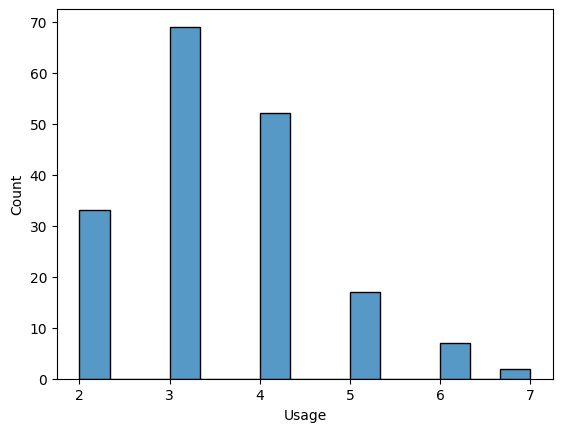

In [37]:
sns.histplot(df['Usage'])

## Observation
1. People with usage 3 followed by 4 and 2 are the top 3 purchasers

<Axes: xlabel='count', ylabel='Fitness'>

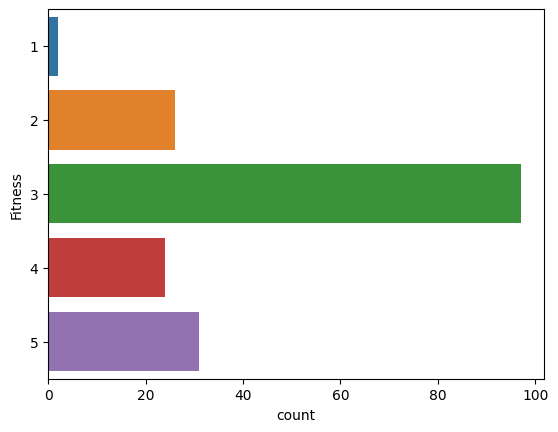

In [38]:
sns.countplot(data = df,y='Fitness')

## Observations:
1. People with fitness 3 followed by 5 and 2 are the top 3 purchasers

<Axes: xlabel='Income', ylabel='Density'>

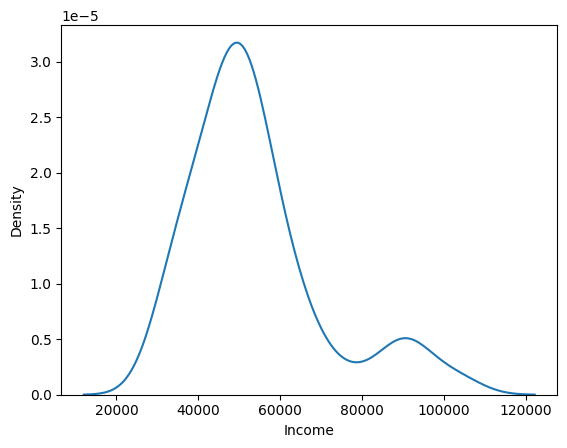

In [39]:
sns.kdeplot(df['Income'])

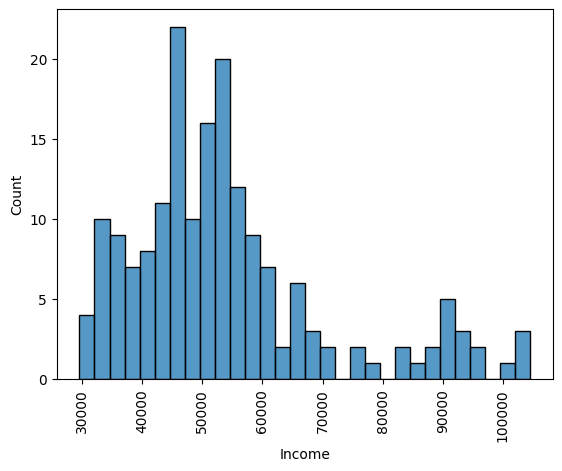

In [40]:
sns.histplot(df['Income'],bins=30)
plt.xticks(rotation='vertical')
plt.show()

## Observation
1. Most people who purchased are around the Income range 45K- 55K

<Axes: xlabel='Miles', ylabel='Count'>

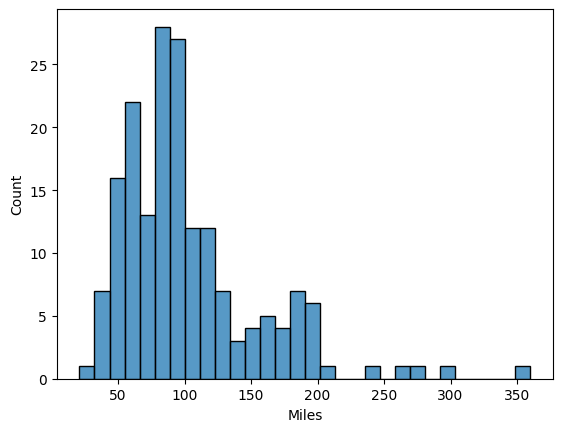

In [41]:
sns.histplot(df['Miles'],bins=30)

## Observation
1. Most people who purchased are around the mile range 80-100

In [42]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


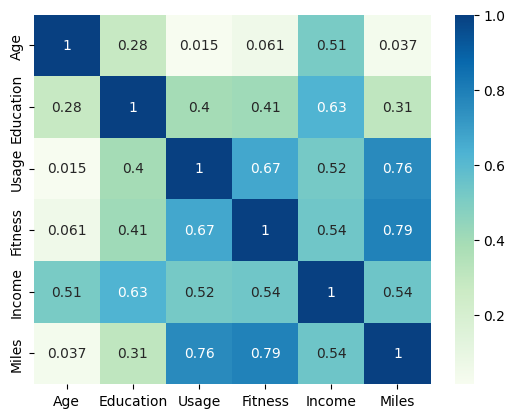

In [43]:
sns.heatmap(df.corr(),cmap='GnBu',annot=True)
plt.show()

# Observations:
1. We can clearly see a strong correlation between Miles, Usage, Fitness

<Axes: xlabel='Age', ylabel='Count'>

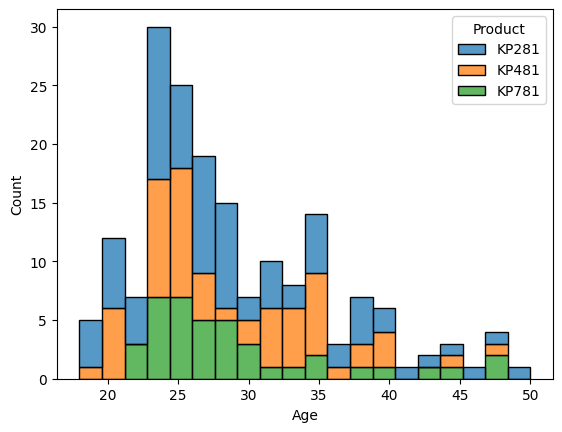

In [44]:
sns.histplot(data=df,x='Age',hue='Product',hue_order=['KP281','KP481','KP781'],multiple='stack',bins=20)

## Observation;
1. We can clearly observe that after the age of 35 there is decline in the purchase behaviour and mixed pattern of buying any of the product. 
2. We infer that age doesn't have much impact on which product people would purchase rather it impact overall purchase 

<Axes: xlabel='Income', ylabel='Count'>

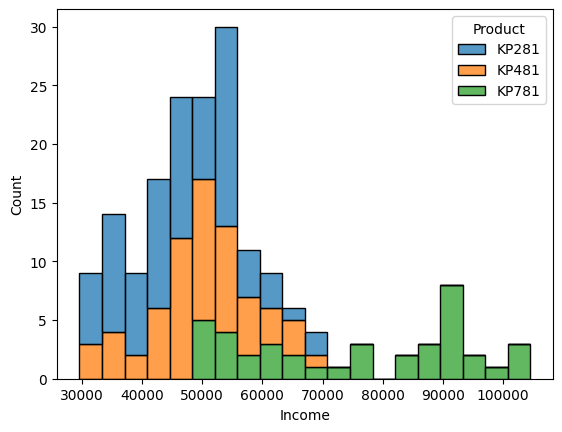

In [45]:
sns.histplot(data=df,x='Income',hue='Product',hue_order=['KP281','KP481','KP781'],multiple='stack',bins=20)

## Observation:
We can infer that Income has a huge impact on which product people purchase
1. The ideal Income group for KP281 is 30K - 70K
2. The ideal Income group for KP481 is 30K - 70K
3. The ideal Income group for KP781 is 47K - 100K


<Axes: xlabel='Education', ylabel='Count'>

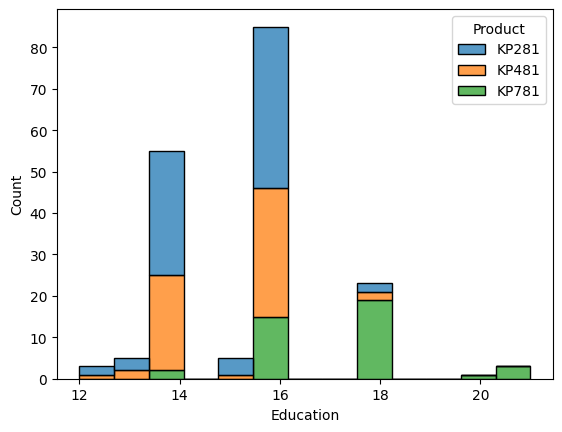

In [46]:
sns.histplot(data=df,x='Education',hue='Product',hue_order=['KP281','KP481','KP781'],multiple='stack')

## Observation:
We can infer that Education also has an impact on overall purchase behaviour as well as which product people purchase.
1. The ideal Education group for KP281 is 14 and 16
2. The ideal Education group for KP481 is 14 and 16
3. The ideal Education group for KP781 is 16 and 18

<Axes: xlabel='MaritalStatus', ylabel='count'>

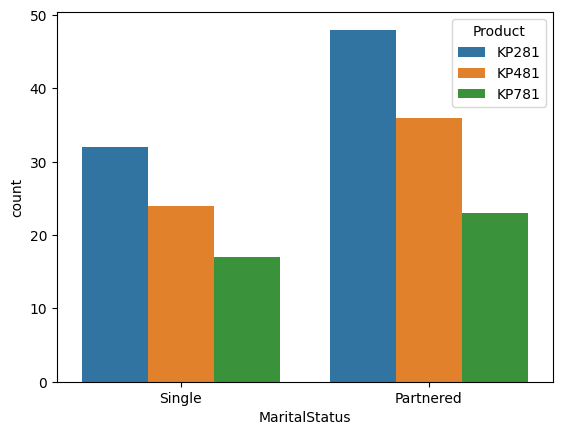

In [47]:

sns.countplot(data=df,hue='Product',x='MaritalStatus')

## Observation
1. Marital status does have some impact on the overall purchase.

<Axes: xlabel='Gender', ylabel='count'>

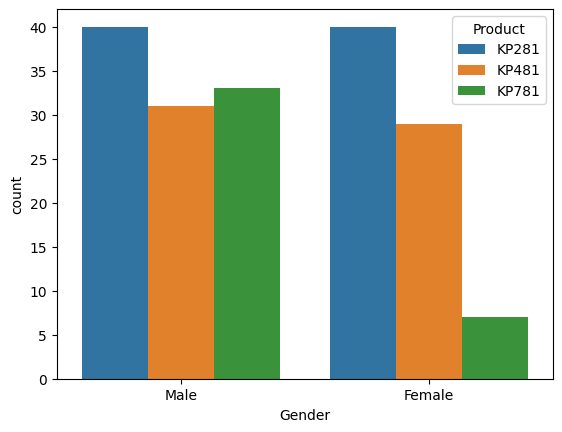

In [48]:
sns.countplot(data=df,hue='Product',x='Gender')

## Observation:
1. KP281 and KP481 are preferred equally by both men and women
2. KP781 is mostly preferred by men

<Axes: xlabel='Usage', ylabel='Count'>

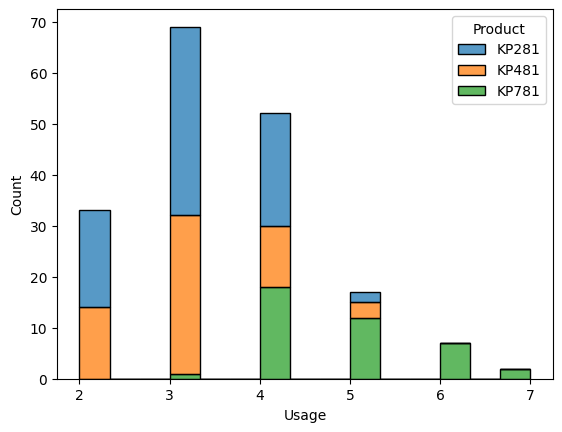

In [49]:
sns.histplot(data=df,x='Usage',hue='Product',hue_order=['KP281','KP481','KP781'],multiple='stack')

## Obseravtion
1. People start to prefer KP781 for usage more than 3 days a week

<Axes: xlabel='Fitness', ylabel='count'>

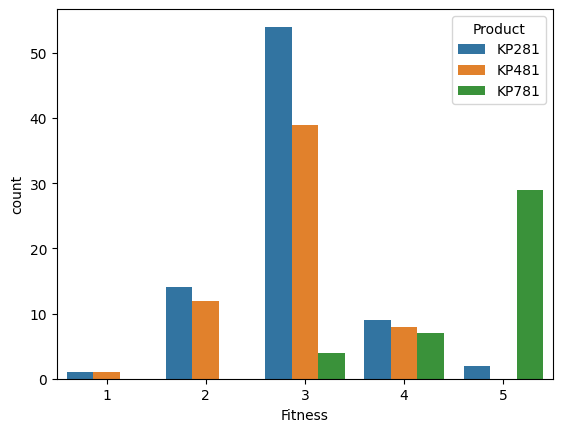

In [50]:
sns.countplot(data=df,x='Fitness',hue='Product')

## Obseravtion
1. People start to prefer KP781 for fitness level more than 3


<Axes: xlabel='Miles', ylabel='Count'>

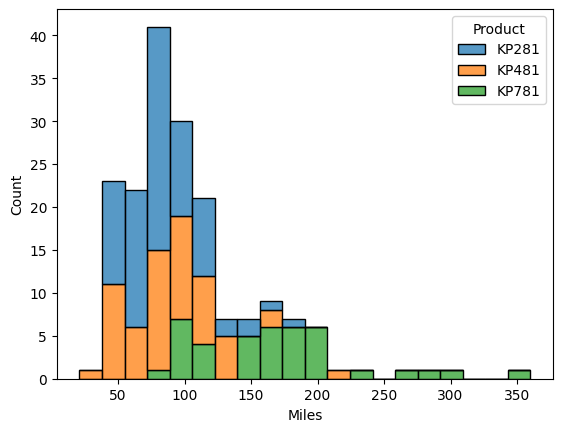

In [51]:
sns.histplot(data=df,x='Miles',hue='Product',hue_order=['KP281','KP481','KP781'],multiple='stack')

## Obseravtion
1. People start to prefer KP781 for miles more than 100


<Axes: xlabel='Education', ylabel='count'>

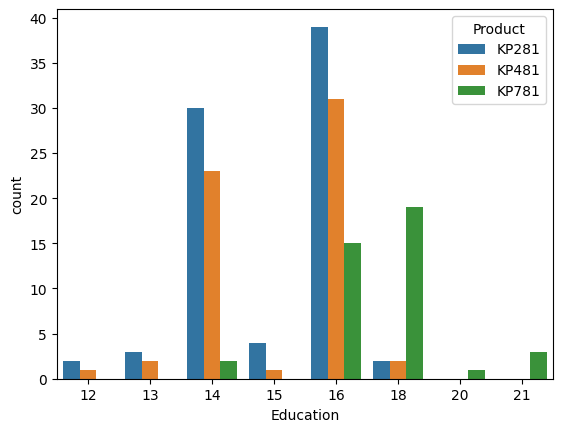

In [52]:
sns.countplot(data=df,hue='Product',x='Education')

<Axes: xlabel='Usage', ylabel='count'>

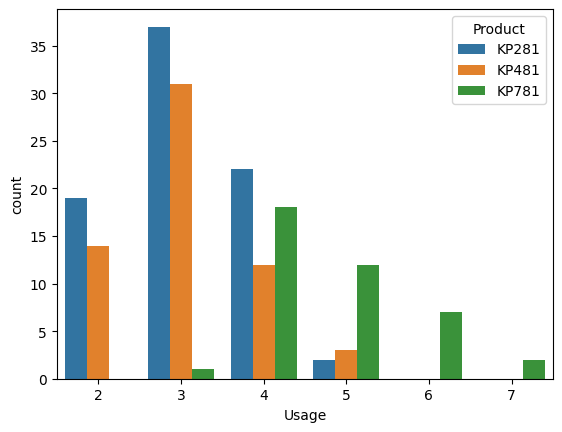

In [53]:
sns.countplot(data=df,hue='Product',x='Usage')

<Axes: xlabel='Fitness', ylabel='count'>

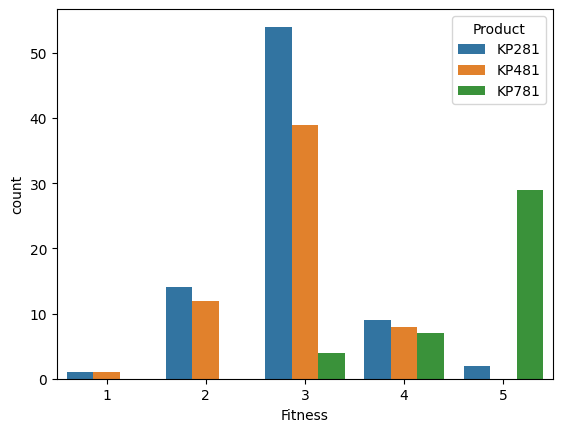

In [54]:
sns.countplot(data=df,hue='Product',x='Fitness')

In [ ]:
sns.boxplot(data=df,x='Miles',y='Income',hue='Product')
plt.rcParams['figure.figsize'] = 21,8
plt.show()

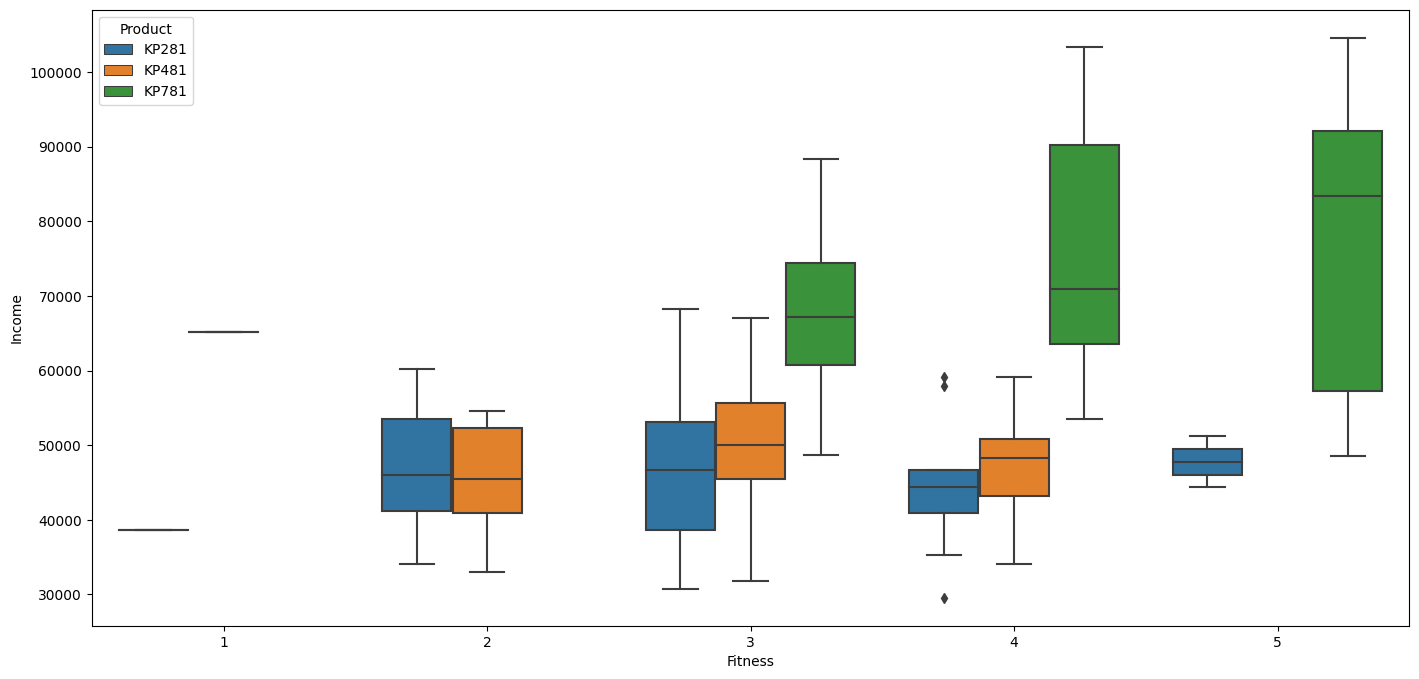

In [56]:
sns.boxplot(data=df,x='Fitness',y='Income',hue='Product')
plt.show()

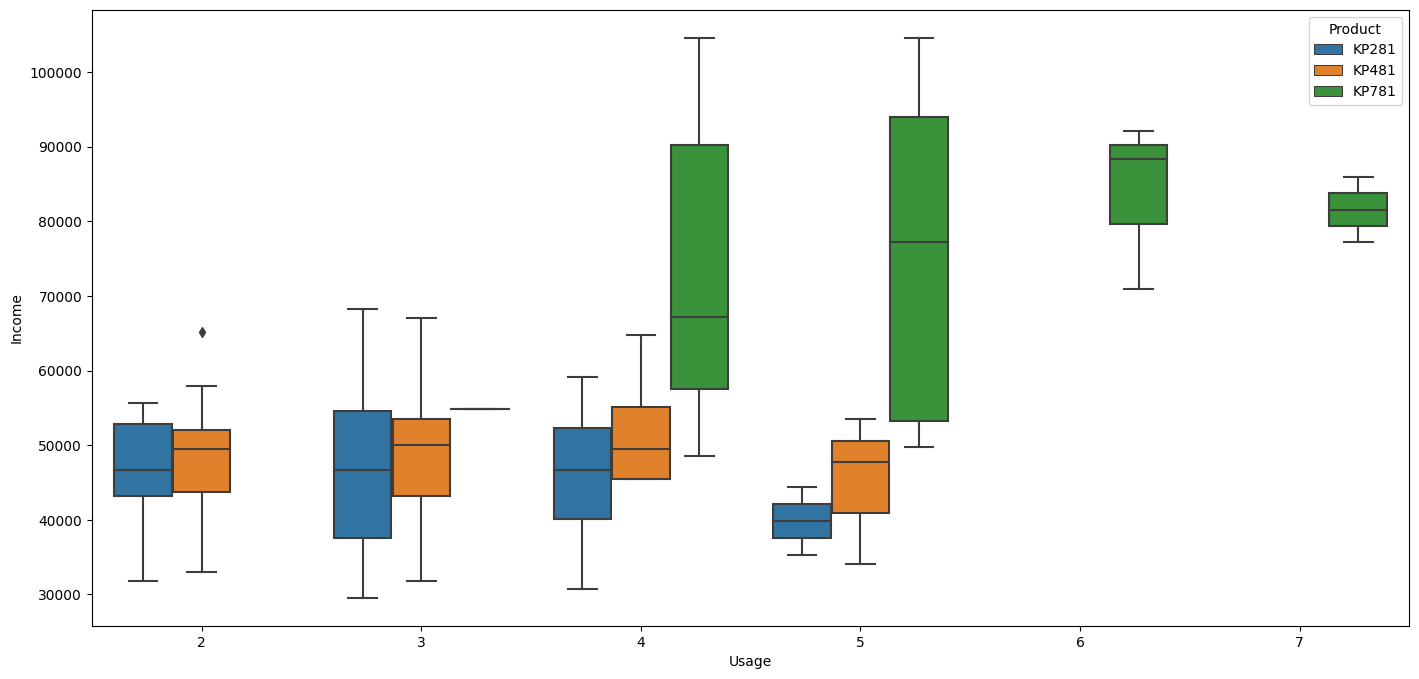

In [57]:
sns.boxplot(data=df,x='Usage',y='Income',hue='Product')
plt.show()

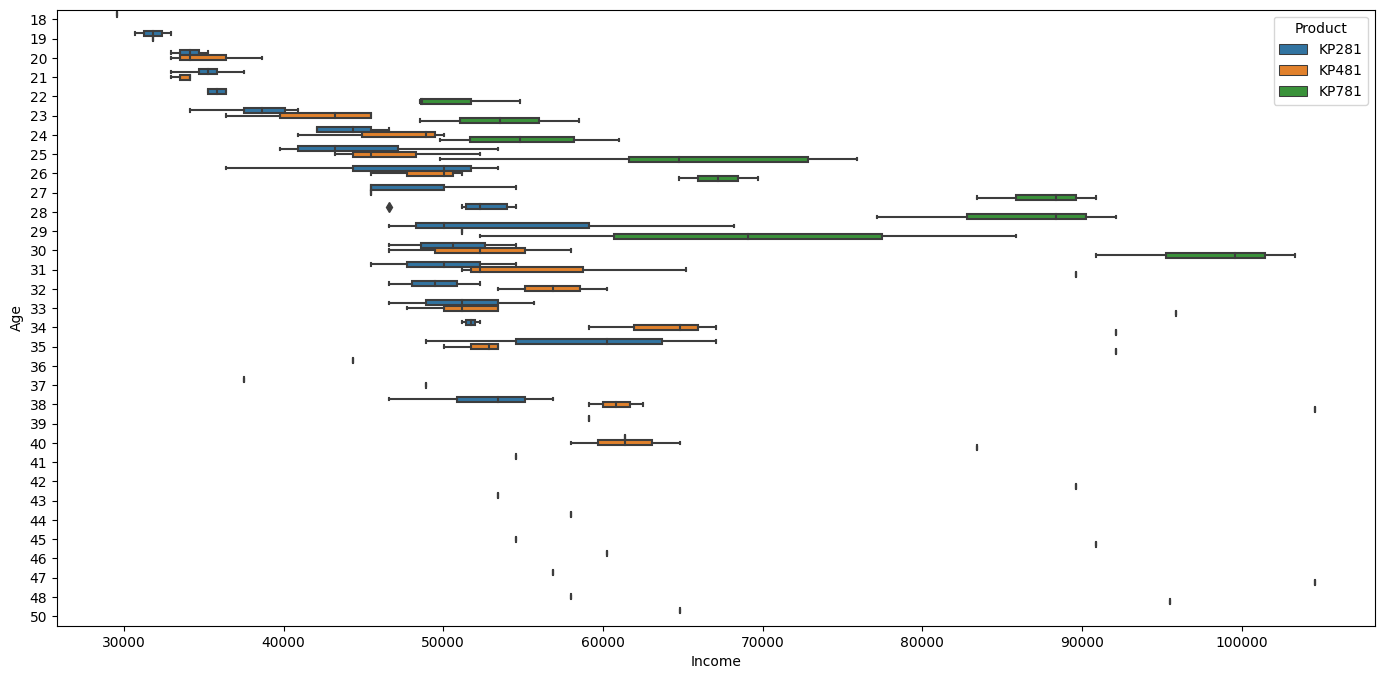

In [58]:
sns.boxplot(data=df,y='Age',x='Income',hue='Product',orient='horizondal')
plt.show()

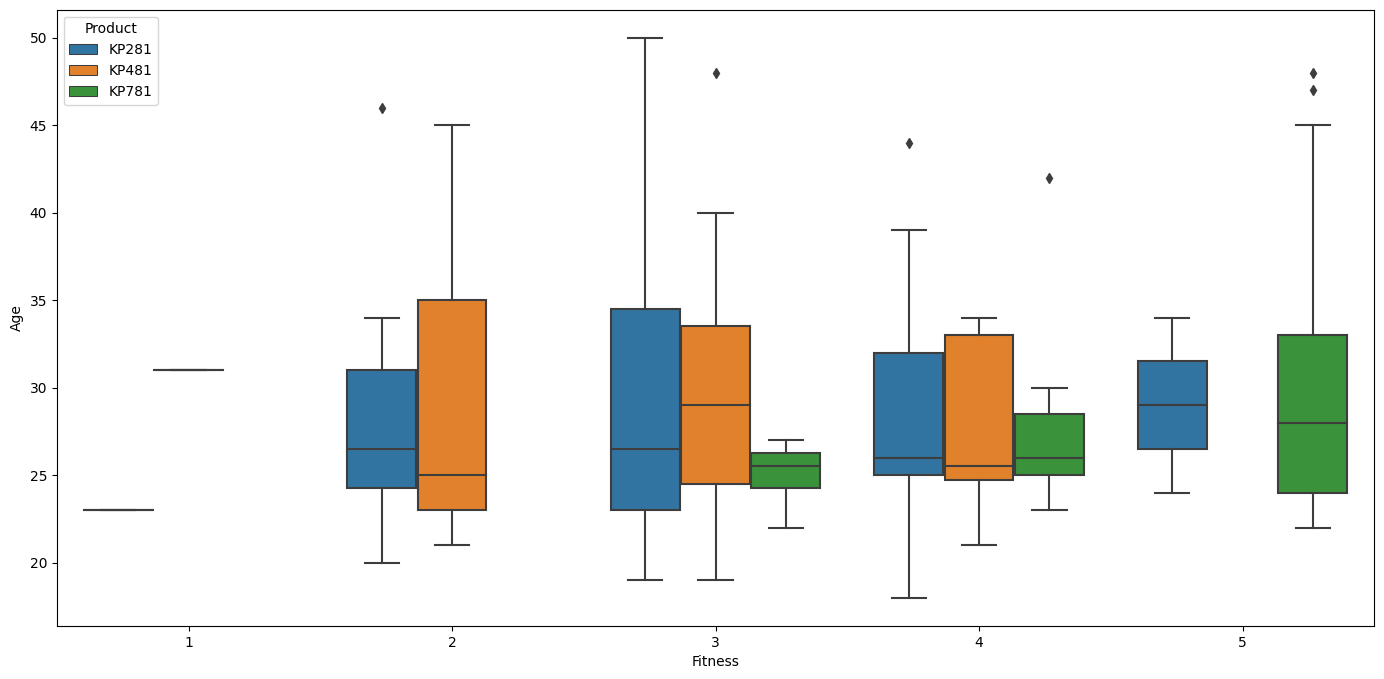

In [59]:
sns.boxplot(data=df,y='Age',x='Fitness',hue='Product')
plt.show()

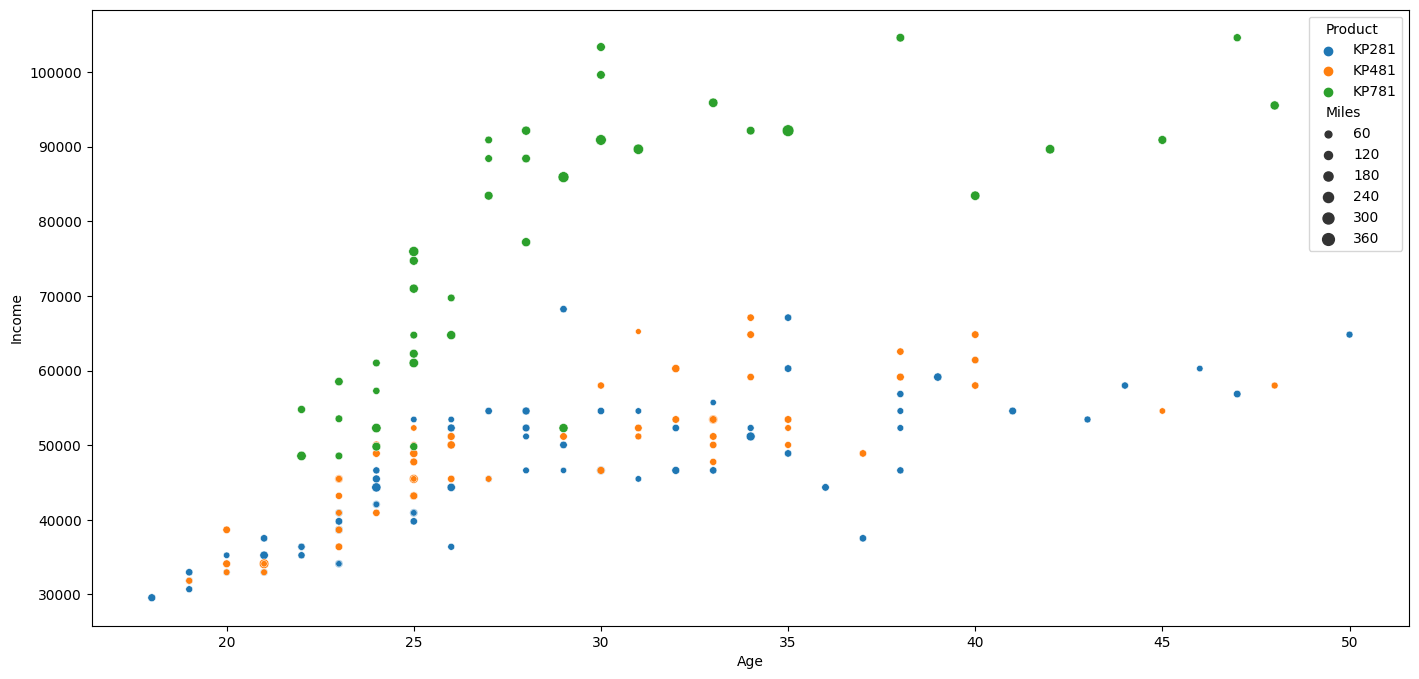

In [60]:
sns.scatterplot(data=df,x='Age',y='Income',hue='Product',size='Miles')
plt.show()

# Observations:
1. We can clearly observe that Income plays a huge role in the purchase of KP781 model.
2. People with age range between 18-35 have more purchases compared to 35-50
3. We can also observe that if the Income is significantly higher that the average income for that age group, people tend to purchase KP781


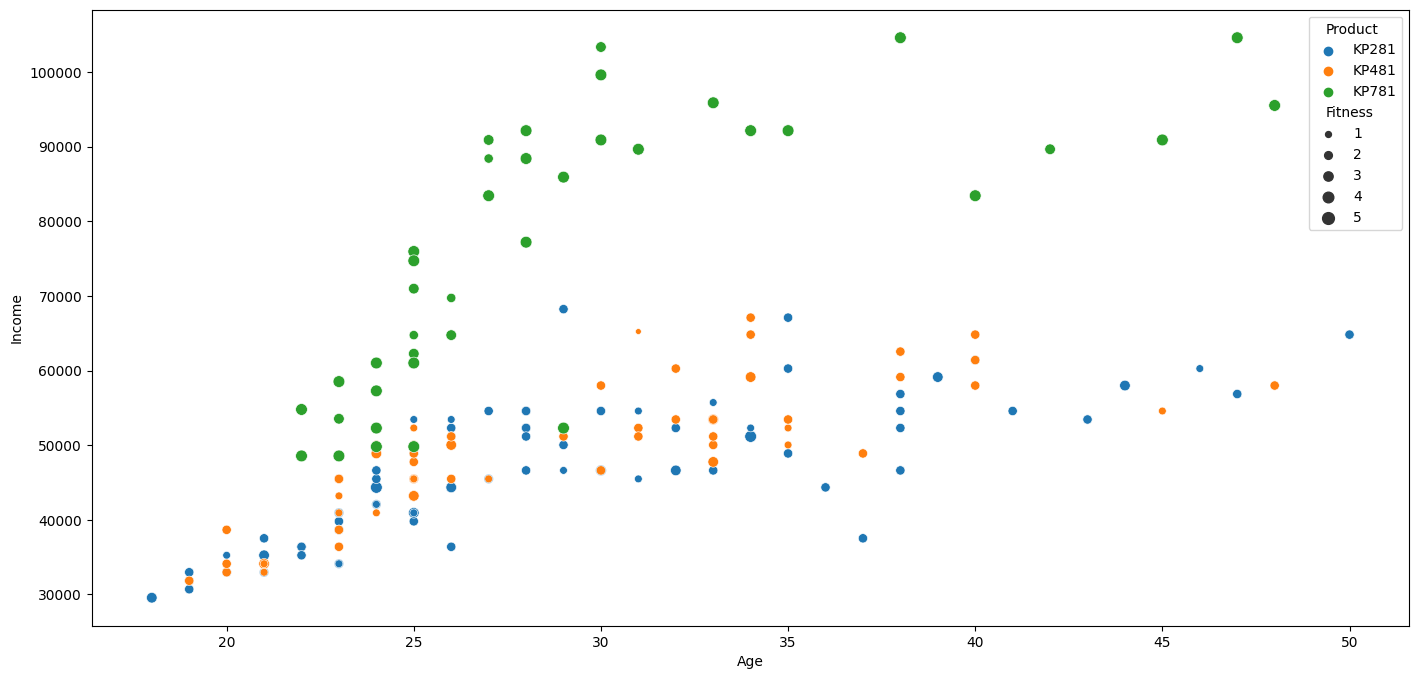

In [61]:
sns.scatterplot(data=df,x='Age',y='Income',hue='Product',size='Fitness')
plt.show()

# Observations:
1. People who say they their fitness level is >= 3 preferred KP781 given their Income is above 48K

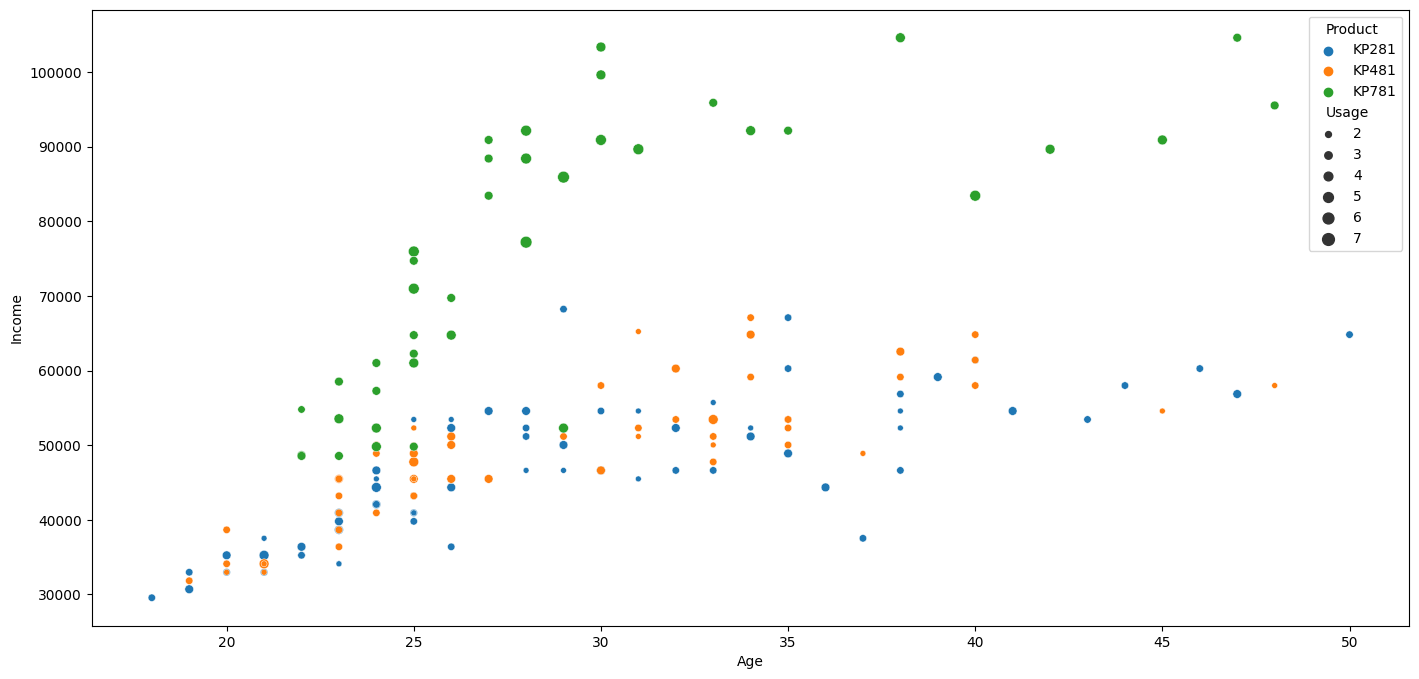

In [62]:
sns.scatterplot(data=df,x='Age',y='Income',hue='Product',size='Usage')
plt.show()

# Observations:
People who say they their Usage level is > 3 times a week preferred KP781 given their Income is above 48K

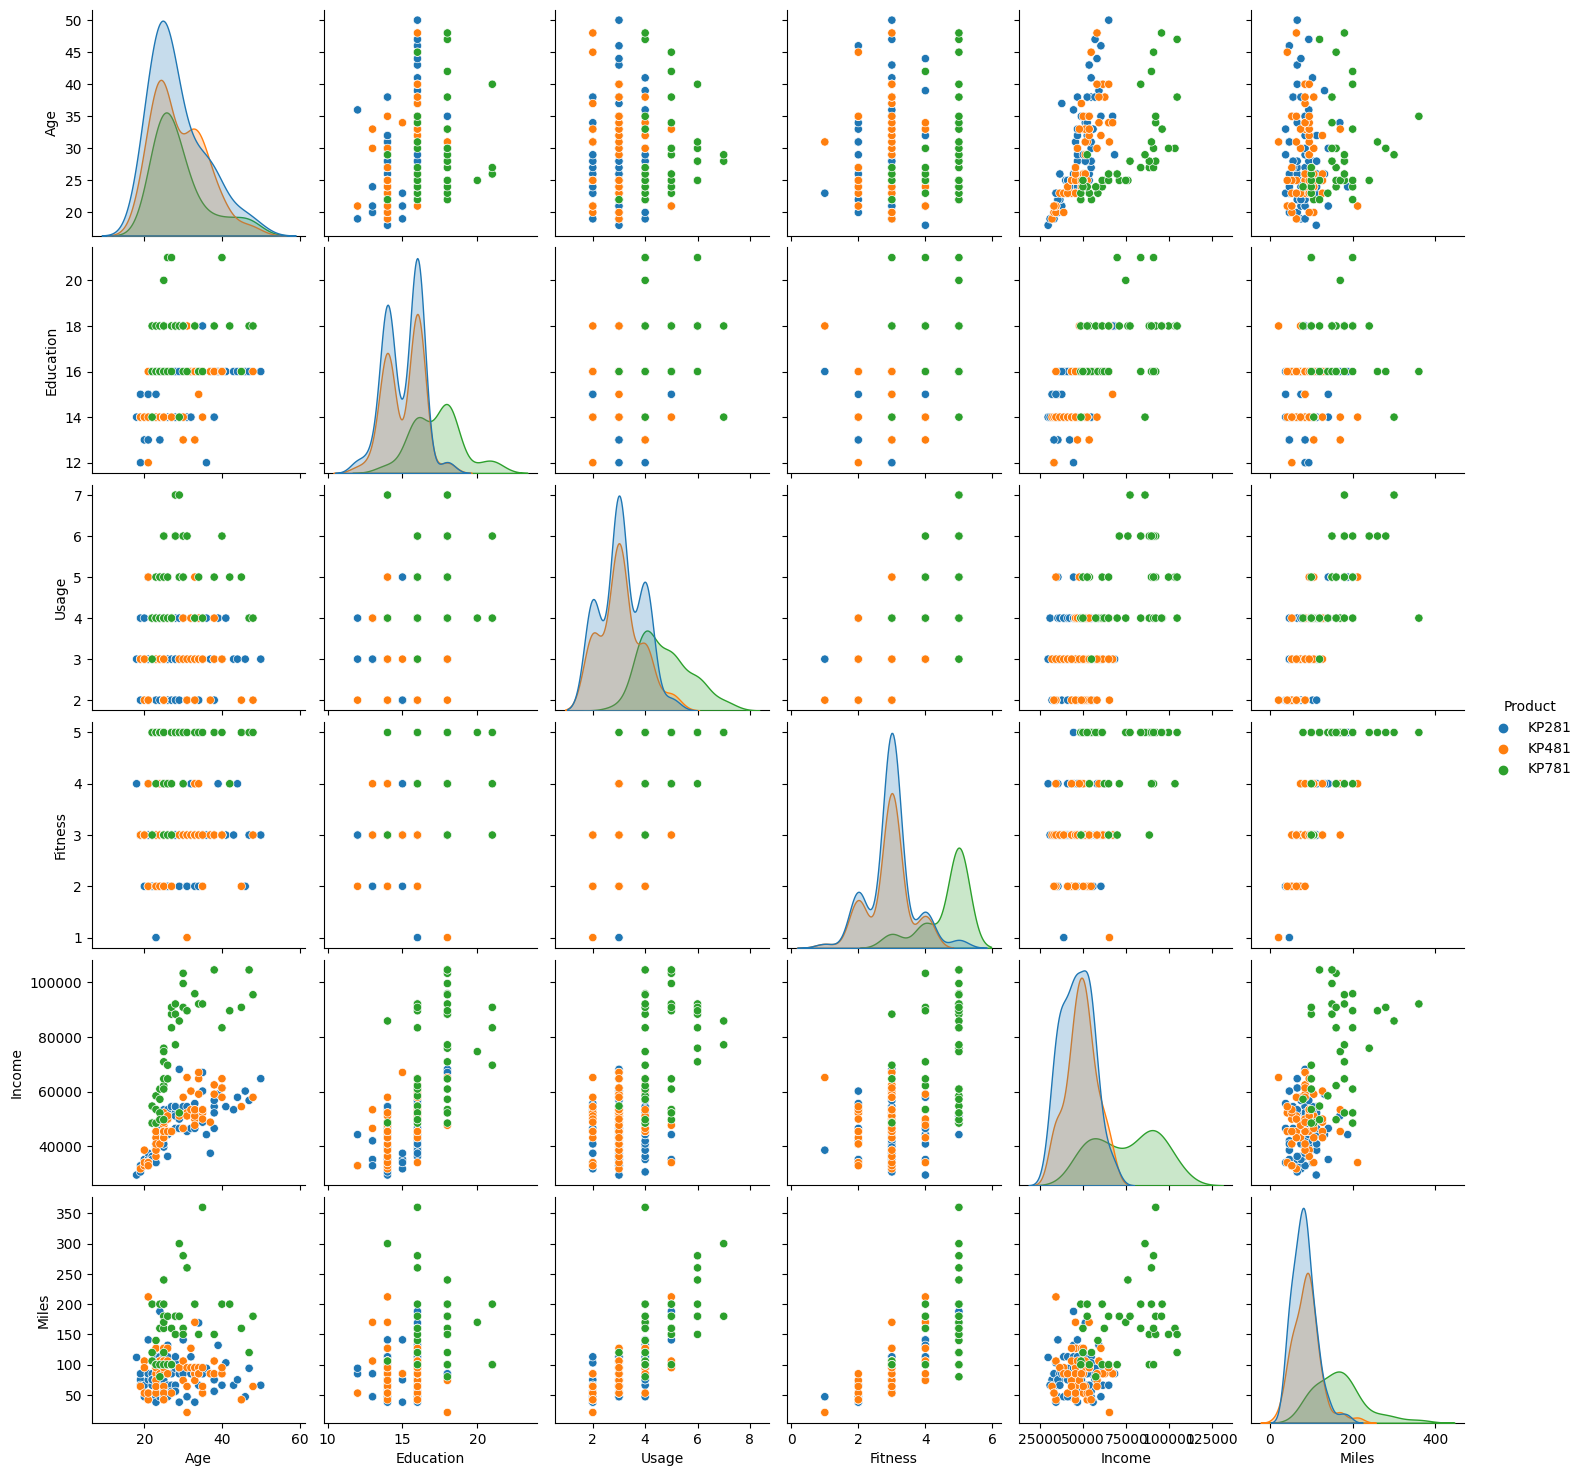

In [63]:
sns.pairplot(df,hue='Product')

Based on the above observations we can segement the customers into 4 groups

**1. Fitness Fanatics:**
*   Age: 22-30
*   Income Range: >47 K
*   Fitness: > 3
*   Usage: > 3
*   Miles: >100

**2. Casual Excercisers:**
*   Age: 23-42
*   Income Range: 37K - 67K
*   Fitness: <4
*   Usage: <5
*   Miles: <130

**3. Budget Conscious Users:**
*   Age: 18-38
*   Income Range: 33K-55K
*   Fitness: <4
*   Usage: <5
*   Miles: <141









## Findings Summary:

### Observations:

1. KP281 is the most purchased model, followed by KP481 and KP781, with 44.44%, 33.33%, and 22.22% of users purchasing them respectively.
2. People in the age group of 20-30 tend to make more purchases.
3. Education level 16, 14, and 18 are the top three among purchasers.
4. Users with fitness level 3, 5, and 2 are the top three purchasers.
5. Most purchases are made by people with an income range of 45K-55K and mile range of 80-100.
6. There is a strong correlation between miles, usage, and fitness.
7. Age does not have a significant impact on the choice of product, but income and education level do.
8. KP781 is preferred more by men, and its usage tends to increase for fitness level >= 3, usage > 3 times a week, and miles > 80.

### Insights:

1. Income, education level, fitness level, usage frequency, and miles are important factors influencing customer preferences and purchase behavior.
2. Targeting specific customer segments such as Fitness Fanatics, Casual Exercisers, and Budget Conscious Users can help in creating effective marketing strategies.
3. Aligning marketing strategies based on customer segments can lead to better sales and customer satisfaction.


# Probability

In [64]:
# Define custom age bins
age_bins = [0, 30, 40, 50, 100]
age_labels = ['18-30', '31-40', '41-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Define custom income bins
income_bins = [0, 35000, 50000, 75000, 150000]
income_labels = ['<35K', '35K-50K', '50K-75K', '75K+']
df['IncomeGroup'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# Define custom miles bins
miles_bins = [0, 100, 200, 300, 360]
miles_labels = ['20-100', '101-200', '201-300', '301-360']
df['MilesGroup'] = pd.cut(df['Miles'], bins=miles_bins, labels=miles_labels)



In [65]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,IncomeGroup,MilesGroup
0,KP281,18,Male,14,Single,3,4,29562,112,18-30,<35K,101-200
1,KP281,19,Male,15,Single,2,3,31836,75,18-30,<35K,20-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-30,<35K,20-100
3,KP281,19,Male,12,Single,3,3,32973,85,18-30,<35K,20-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-30,35K-50K,20-100
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,31-40,75K+,101-200
176,KP781,42,Male,18,Single,5,4,89641,200,41-50,75K+,101-200
177,KP781,45,Male,16,Single,5,5,90886,160,41-50,75K+,101-200
178,KP781,47,Male,18,Partnered,4,5,104581,120,41-50,75K+,101-200


In [66]:
cont_table1 = pd.crosstab(df['Product'], df['IncomeGroup'],margins=True)

In [67]:

cont_table1

IncomeGroup,<35K,35K-50K,50K-75K,75K+,All
Product,,,,,
KP281,8,40,32,0,80
KP481,6,24,30,0,60
KP781,0,5,14,21,40
All,14,69,76,21,180


## Observation
**1. Marginal probability:**


> Products



*   P(KP281) - The probability of people buying KP281 = 80/180
*   P(KP481) - The probability of people buying KP481 = 60/180
*   P(KP781) - The probability of people buying KP781 = 40/180


> Income groups


*   P(<35K) - The probability of people purchasing in the income group <35k = 14/180
*   P(35K - 50K) - The probability of people purchasing in the income group 35k-50K = 69/180
*   P(50K - 75K) - The probability of people purchasing in the income group 50K-75K = 76/180
*   P(75K+) - The probability of people purchasing in the income group 75K+ = 21/180

**2.Condtional Probability - P(Product|IncomeGroup)**


> P(Products|<35K)


*   P(KP281|<35K) =  8/14
*   P(KP481|<35K) = 6/14
*   P(KP781|<35K) = 0

> P(Products|35K-50K)

*   P(KP281|35K-50K) =  40/69
*   P(KP481|35K-50K) = 24/69
*   P(KP781|35K-50K) = 5/69

> P(Products|50K-75K)

*   P(KP281|50K-75K) =  32/76
*   P(KP481|50K-75K) = 30/76
*   P(KP781|50K-75K) = 14/76

> P(Products|75K+)

*   P(KP281|75K+) =  0
*   P(KP481|75K+) = 0
*   P(KP781|75K+) = 21/21 = 1






In [68]:
cont_table2 = pd.crosstab(df['Product'], df['AgeGroup'],margins=True)

In [69]:
cont_table2

AgeGroup,18-30,31-40,41-50,All
Product,,,,
KP281,55,19,6,80
KP481,35,23,2,60
KP781,30,6,4,40
All,120,48,12,180


## Observations:
**1. Marginal Probability of AgeGroup**
*   P(18-30) = 120/180
*   P(31-40) = 48/180
*   P(41-50) = 12/180

**2.Condtional Probability P(Products|AgeGroups)**


> P(Products|18-30)


*   P(KP281|18-30) =  55/120
*   P(KP481|18-30) = 35/120
*   P(KP781|18-30) = 30/120

> P(Products|31-40)

*   P(KP281|31-40) =  19/48
*   P(KP481|31-40) = 23/48
*   P(KP781|31-40) = 6/48

> P(Products|41-50)

*   P(KP281|41-50) =  6/12
*   P(KP481|41-50) = 2/12
*   P(KP781|41-50) = 4/12


In [70]:

cont_table3 = pd.crosstab(df['Product'], df['MilesGroup'],margins=True)

In [71]:
cont_table3

MilesGroup,20-100,101-200,201-300,301-360,All
Product,,,,,
KP281,62,18,0,0,80
KP481,44,15,1,0,60
KP781,8,27,4,1,40
All,114,60,5,1,180


## Observations:
**1. Marginal Probability of MilesGroup**
*   P(20-100) = 114/180
*   P(101-200) = 60/180
*   P(201-300) = 5/180
*   P(301-360) = 1/180


**2.Condtional Probability P(Product|MilesGroup)**


> P(Products|20-100)


*   P(KP281|20-100) =  62/114
*   P(KP481|20-100) = 44/114
*   P(KP781|20-100) = 8/114

> P(Products|101-200)

*   P(KP281|101-200) =  18/60
*   P(KP481|101-200) = 15/60
*   P(KP781|101-200) = 27/60

> P(Products|201-300)

*   P(KP281|201-300) =  0
*   P(KP481|201-300) = 1/5
*   P(KP781|201-300) = 4/5

> P(Products|301-360)

*   P(KP281|301-360) =  0 
*   P(KP481|301-360) = 0
*   P(KP781|301-360) = 1



In [72]:
cont_table4 = pd.crosstab(df['Product'], df['Usage'],margins=True)

In [73]:
cont_table4

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


## Observations:
**1. Marginal Probability of Usage per week**
*   P(2) = 33/180
*   P(3) = 69/180
*   P(4) = 52/180
*   P(5) = 17/180
*   P(6) = 7/180
*   P(7) = 2/180


**2.Condtional Probability P(Products|Usage per week)**


> P(Products|2)


*   P(KP281|2) =  19/33
*   P(KP481|2) = 14/33
*   P(KP781|2) = 0/33

> P(Products|3)

*   P(KP281|3) =  37/69
*   P(KP481|3) = 31/69
*   P(KP781|3) = 1/69

> P(Products|4)

*   P(KP281|2) =  22/52
*   P(KP481|2) = 12/52
*   P(KP781|2) = 18/52

> P(Products|5)

*   P(KP281|5) =  2/17
*   P(KP481|5) = 13/17
*   P(KP781|5) = 12/17

> P(Products|6)

*   P(KP281|2) =  0
*   P(KP481|2) = 0
*   P(KP781|2) = 7/7 = 1

> P(Products|7)

*   P(KP281|7) =  0
*   P(KP481|7) = 0
*   P(KP781|7) = 2/2 = 1


In [75]:
pd.crosstab(df['Product'], [df['Gender'],df['Usage']],margins=True)

Gender  Female               Male                    All
Usage        2   3   4  5  6    2   3   4   5  6  7     
Product                                                 
KP281       13  19   7  1  0    6  18  15   1  0  0   80
KP481        7  14   5  3  0    7  17   7   0  0  0   60
KP781        0   0   2  3  2    0   1  16   9  5  2   40
All         20  33  14  7  2   13  36  38  10  5  2  180

In [76]:
pd.crosstab(df['Gender'],df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [77]:
pd.crosstab(df['Gender'],df['Product'],margins=True,normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


## Insights:

1. KP281 is the most purchased model, followed by KP481 and KP781, with 44.44%, 33.33%, and 22.22% of users purchasing them respectively. This indicates that KP281 is the most popular model among the three.
2. People in the age group of 20-30 tend to make more purchases, indicating that this age group is more inclined towards fitness products.
3. Education level 16, 14, and 18 are the top three among purchasers, suggesting that higher education levels may influence purchasing decisions.
4. Users with fitness level 3, 5, and 2 are the top three purchasers, indicating that higher fitness levels may drive purchase behavior.
5. Most purchases are made by people with an income range of 45K-55K and mile range of 80-100, suggesting that these income and mile ranges may be the ideal target audience for the products.
6. There is a strong correlation between miles, usage, and fitness, indicating that customers who are more active and use the products more frequently tend to purchase more.
7. Age has impact on overall purchase. But no significant impact on the choice of product, but income and education level do have impact of choice of product, suggesting that income and education level are important factors to consider in marketing strategies.
8. KP781 is preferred more by men, and its usage tends to increase for fitness level >= 3, usage > 3 times a week, and miles > 80, indicating that this model may be more suitable for male customers who are highly active and have higher fitness goals.
9. The income range of 30K-70K is ideal for KP281 and KP481, while the income range of 47K-100K is ideal for KP781, suggesting that pricing and marketing strategies should be tailored to these income ranges for each model.
10. Based on the data, the ideal customer segment for KP281 and KP481 may be casual exercisers with lower fitness levels and moderate income, while the ideal customer segment for KP781 may be fitness enthusiasts with higher fitness levels and higher income.

## Recommendations:

1. Focus on marketing strategies that target the age group of 20-30, as they tend to make more purchases.
2. Develop marketing campaigns that highlight the education levels of 16, 14, and 18, as these are the top three education levels among purchasers.
3. Offer promotions or discounts for customers with fitness levels of 3, 5, and 2 to encourage more purchases.
4. Tailor pricing and marketing strategies for each income range, with a focus on the income range of 30K-70K for KP281 and KP481, and 47K-100K for KP781.
5. Develop marketing campaigns that highlight the strong correlation between miles, usage, and fitness, to encourage more purchases from active and frequent users.
6. Create targeted marketing campaigns that cater to the preferences and needs of male customers for KP781, as it is preferred more by men.
7. Offer special deals or promotions for customers who use the products more than 3 times a week or have fitness levels >= 3, as they are more likely to purchase.
8. Consider offering financing options or installment plans for customers with moderate income levels, to make the products more accessible to them.

